In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,0,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,1,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,0,12,16,Male,3
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,0,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,0,19,30,Female,1


In [4]:
test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,1,10,37,Male
1,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,0,6,23,Male
2,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,0,5,20,Male
3,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,0,6,8,Male
4,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,1,9,21,Male


In [5]:
train.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency        0
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [6]:
test.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency        0
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [7]:
train = train.drop(columns=['Length_Employed', 'Number_Open_Accounts','Total_Accounts','Gender','Home_Owner'], axis=1)
test = test.drop(columns=['Length_Employed', 'Number_Open_Accounts','Total_Accounts','Gender','Home_Owner'], axis=1)

In [8]:
train.head()

,Loan_Amount_Requested,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Interest_Rate
0,"7,000",68000.0,not verified,car,18.37,0,0,1
1,"30,000",NaN,VERIFIED - income,debt_consolidation,14.93,0,1,3
2,"24,725",75566.4,VERIFIED - income source,debt_consolidation,15.88,0,0,3
3,"16,000",56160.0,VERIFIED - income source,debt_consolidation,14.34,3,0,3
4,"17,000",96000.0,VERIFIED - income source,debt_consolidation,22.17,1,0,1


In [9]:
test.head()

,Loan_Amount_Requested,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency
0,"27,500",129000.0,VERIFIED - income,debt_consolidation,12.87,0,1
1,"26,000",110000.0,not verified,credit_card,11.37,0,0
2,"6,075",75000.0,VERIFIED - income,debt_consolidation,6.83,2,0
3,"12,000",73000.0,VERIFIED - income source,debt_consolidation,7.76,0,0
4,"35,000",156000.0,not verified,debt_consolidation,9.62,0,1


In [10]:
train.isnull().sum()

Loan_Amount_Requested          0
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency        0
Interest_Rate                  0
dtype: int64

In [11]:
test.isnull().sum()

Loan_Amount_Requested          0
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency        0
dtype: int64

In [12]:
train.Annual_Income=train.Annual_Income.astype('float')
test.Annual_Income=test.Annual_Income.astype('float')

In [13]:
train.Annual_Income.dtype

dtype('float64')

In [14]:
train.Annual_Income= np.log(train.Annual_Income)
test.Annual_Income= np.log(test.Annual_Income)

In [15]:
train.Annual_Income

0         11.127263
1               NaN
2         11.232767
3         10.935960
4         11.472103
5         10.308953
6         11.350407
7         11.652687
8               NaN
9         12.001505
10        11.034890
11        11.156251
12        10.915088
13              NaN
14         9.680344
15        11.522876
16              NaN
17        10.819778
18        11.034890
19         9.903488
20        10.915088
21        10.915088
22        10.778956
23        10.747208
24              NaN
25        11.314475
26        11.736069
27              NaN
28        10.184900
29        11.314475
            ...    
164279    10.616437
164280    10.778956
164281          NaN
164282    11.097410
164283    11.034890
164284    11.521925
164285    11.082143
164286    12.043554
164287    11.097410
164288    10.308953
164289          NaN
164290    10.571317
164291    10.819778
164292    11.018629
164293    11.407565
164294    10.915088
164295    10.014850
164296    11.289782
164297    10.819778


In [16]:
mean_train = train.Annual_Income.mean(skipna=True)
mean_test = test.Annual_Income.mean(skipna=True)

In [17]:
mean_train

11.057788185425027

In [18]:
mean_test

11.058882292997401

In [19]:
train.Annual_Income = train.Annual_Income.replace(np.NaN, mean_train)
test.Annual_Income = test.Annual_Income.replace(np.NaN, mean_test)

In [20]:
train.isnull().sum()

Loan_Amount_Requested      0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Interest_Rate              0
dtype: int64

In [21]:
test.isnull().sum()

Loan_Amount_Requested      0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
dtype: int64

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


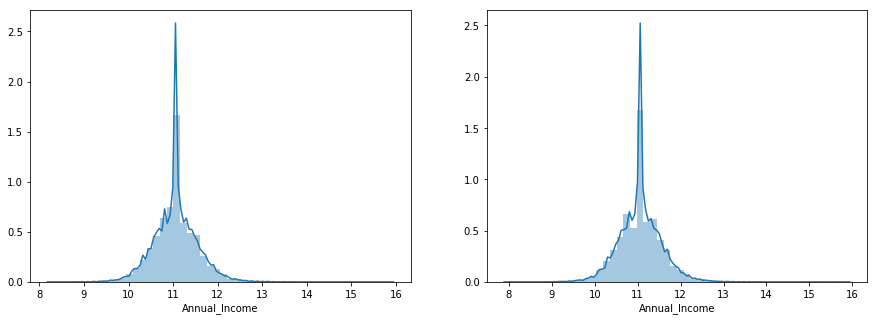

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train.Annual_Income);
plt.subplot(1,2,2)
sns.distplot(test.Annual_Income);

In [23]:
train["Income_Verified"] = train["Income_Verified"].astype('category')
train["Income_Verified"] = train["Income_Verified"].cat.codes
train["Purpose_Of_Loan"] = train["Purpose_Of_Loan"].astype('category')
train["Purpose_Of_Loan"] = train["Purpose_Of_Loan"].cat.codes

In [24]:
test["Income_Verified"] = test["Income_Verified"].astype('category')
test["Income_Verified"] = test["Income_Verified"].cat.codes
test["Purpose_Of_Loan"] = test["Purpose_Of_Loan"].astype('category')
test["Purpose_Of_Loan"] = test["Purpose_Of_Loan"].cat.codes

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 8 columns):
Loan_Amount_Requested      164309 non-null object
Annual_Income              164309 non-null float64
Income_Verified            164309 non-null int8
Purpose_Of_Loan            164309 non-null int8
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    164309 non-null int64
Interest_Rate              164309 non-null int64
dtypes: float64(2), int64(3), int8(2), object(1)
memory usage: 7.8+ MB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 7 columns):
Loan_Amount_Requested      109541 non-null object
Annual_Income              109541 non-null float64
Income_Verified            109541 non-null int8
Purpose_Of_Loan            109541 non-null int8
Debt_To_Income             109541 non-null float64
Inquiries_Last_6Mo         109541 non-null int64
Months_Since_Deliquency    109541 non-null int64
dtypes: float64(2), int64(2), int8(2), object(1)
memory usage: 4.4+ MB


In [27]:
train['Interest_Rate'] = train['Interest_Rate'].astype('category')
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].apply(lambda x: x.replace(',',''))
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].astype('float')

test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].apply(lambda x: x.replace(',',''))
test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].astype('float')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 8 columns):
Loan_Amount_Requested      164309 non-null float64
Annual_Income              164309 non-null float64
Income_Verified            164309 non-null int8
Purpose_Of_Loan            164309 non-null int8
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    164309 non-null int64
Interest_Rate              164309 non-null category
dtypes: category(1), float64(3), int64(2), int8(2)
memory usage: 6.7 MB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 7 columns):
Loan_Amount_Requested      109541 non-null float64
Annual_Income              109541 non-null float64
Income_Verified            109541 non-null int8
Purpose_Of_Loan            109541 non-null int8
Debt_To_Income             109541 non-null float64
Inquiries_Last_6Mo         109541 non-null int64
Months_Since_Deliquency    109541 non-null int64
dtypes: float64(3), int64(2), int8(2)
memory usage: 4.4 MB


In [30]:
y = train['Interest_Rate']

In [31]:
X = train.drop(['Interest_Rate'], axis=1)

In [32]:
X.head()

,Loan_Amount_Requested,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency
0,7000.0,11.127263,2,0,18.37,0,0
1,30000.0,11.057788,0,2,14.93,0,1
2,24725.0,11.232767,1,2,15.88,0,0
3,16000.0,10.935960,1,2,14.34,3,0
4,17000.0,11.472103,1,2,22.17,1,0


In [33]:
test.head()

,Loan_Amount_Requested,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency
0,27500.0,11.767568,0,2,12.87,0,1
1,26000.0,11.608236,2,1,11.37,0,0
2,6075.0,11.225243,0,2,6.83,2,0
3,12000.0,11.198215,1,2,7.76,0,0
4,35000.0,11.957611,2,2,9.62,0,1


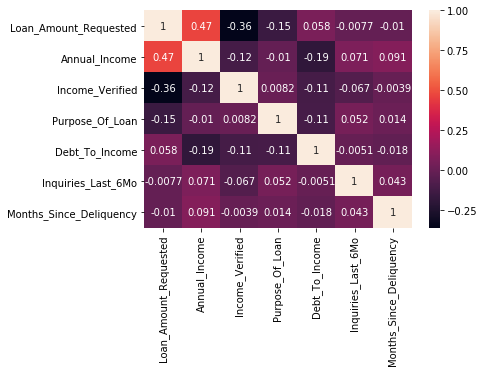

In [34]:
sns.heatmap(train.corr(), annot=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [36]:
model_random = RandomForestClassifier()

In [37]:
model_random.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
model_random.feature_importances_

array([0.24671239, 0.25187154, 0.02709036, 0.05212336, 0.37336749,
       0.03652678, 0.01230808])

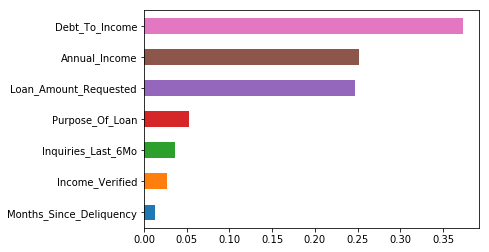

In [39]:
data = pd.Series(model_random.feature_importances_, index = X_train.columns)
data.sort_values(ascending=True, inplace=True) #petal length is most important feature
data.plot.barh()

In [40]:
model_random.score(X_train, y_train)

0.9764619960896788

In [41]:
y_pred_rf =model_random.predict(X_test)

In [42]:
model_random.classes_

array([1, 2, 3])

In [43]:
confusion_matrix(y_test,y_pred_rf)

array([[2134, 3290, 1286],
       [2691, 7457, 3996],
       [1307, 5148, 5553]])

In [44]:
accuracy_score(y_test,y_pred_rf)

0.4608362242103341

In [45]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           1       0.35      0.32      0.33      6710\n           2       0.47      0.53      0.50     14144\n           3       0.51      0.46      0.49     12008\n\n   micro avg       0.46      0.46      0.46     32862\n   macro avg       0.44      0.44      0.44     32862\nweighted avg       0.46      0.46      0.46     32862\n'

# Using ADAPTIVE BOOSTING TECHNIQUE

In [46]:
model_ada = AdaBoostClassifier(n_estimators=120, random_state = 10)

In [47]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=120, random_state=10)

In [48]:
model_ada.score(X_train, y_train)

0.5251394098001476

In [49]:
y_pred_ada = model_ada.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred_ada)

0.520296999573976

### Accuracy is 52.03% and f1-Score is 58%

In [51]:
classification_report(y_test, y_pred_ada)

'              precision    recall  f1-score   support\n\n           1       0.50      0.18      0.27      6710\n           2       0.49      0.66      0.56     14144\n           3       0.58      0.55      0.56     12008\n\n   micro avg       0.52      0.52      0.52     32862\n   macro avg       0.52      0.46      0.46     32862\nweighted avg       0.52      0.52      0.50     32862\n'

# Using ADAPTIVE BOOSTING TECHNIQUE

In [52]:
test_predict = model_ada.predict(test)

In [53]:
test_predict

array([3, 1, 2, ..., 2, 3, 2])

In [54]:
test['test_predict'] = test_predict

In [55]:
test.head()

,Loan_Amount_Requested,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,test_predict
0,27500.0,11.767568,0,2,12.87,0,1,3
1,26000.0,11.608236,2,1,11.37,0,0,1
2,6075.0,11.225243,0,2,6.83,2,0,2
3,12000.0,11.198215,1,2,7.76,0,0,2
4,35000.0,11.957611,2,2,9.62,0,1,2


In [56]:
submission = test[['test_predict']]

In [57]:
submission.to_csv('submission.csv')